In [53]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
TRAIN_PATH = '../audio_train/'
ipd.Audio(TRAIN_PATH + "a439d172.wav")

In [87]:
sample_rate, audio = wavfile.read(TRAIN_PATH + "a439d172.wav")
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 6s


In [88]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

In [89]:
audioN = normalize_audio(audio)


In [90]:
x = np.linspace(0, len(audioN)/ sample_rate, len(audioN))
y = audio

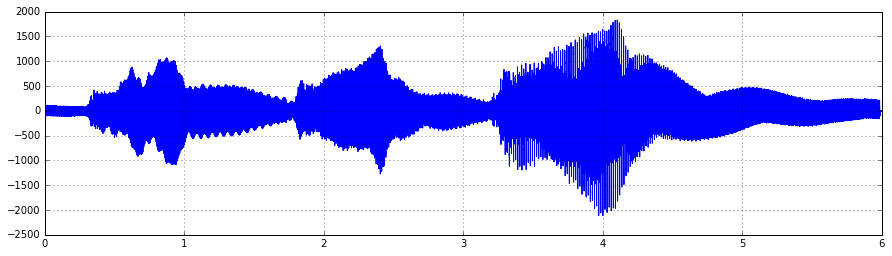

In [93]:
plt.figure(figsize=(15,4))
plt.plot(x, audio)
plt.grid(True)

In [103]:
from tqdm import tqdm_notebook
import wave
from scipy.io import wavfile
SAMPLE_RATE = 44100

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

In [105]:
INPUT_LIB = '../'
audio_train_files = os.listdir('../audio_train')
#audio_test_files = os.listdir('../audio_test')
train = pd.read_csv('../train.csv')
#submission = pd.read_csv("../input/sample_submission.csv", index_col='fname')
train_audio_path = '../audio_train/'
filename = '/001ca53d.wav' # Hi-hat
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
#sample_rate = 16000

In [107]:
print(samples)
print("Size of training data",train.shape)

[-33 -32 -34 ...,  -1  -1  -1]
('Size of training data', (9473, 3))


In [108]:
train.head()

fname         label  manually_verified
0  00044347.wav        Hi-hat                  0
1  001ca53d.wav     Saxophone                  1
2  002d256b.wav       Trumpet                  0
3  0033e230.wav  Glockenspiel                  1
4  00353774.wav         Cello                  1

In [109]:
def load_wav_file(name, path):
    _, b = wavfile.read(path + name)
    assert _ == SAMPLE_RATE
    return b

In [110]:
train_data = pd.DataFrame({'file_name' : train['fname'],
                         'target' : train['label']})  

In [114]:
train_data.head()

file_name        target  \
0  00044347.wav        Hi-hat   
1  001ca53d.wav     Saxophone   
2  002d256b.wav       Trumpet   
3  0033e230.wav  Glockenspiel   
4  00353774.wav         Cello   

                                         time_series  
0  [0, 26, -5, -12, -8, -16, -30, -9, 3, 17, 67, ...  
1  [-33, -32, -34, -34, -37, -37, -39, -39, -41, ...  
2  [0, 0, -2, -1, -1, -2, 0, 0, -1, -1, -1, 1, -1...  
3  [0, 10, 39, -66, -49, 29, 4, -57, -133, -158, ...  
4  [-173, -162, -172, -142, -170, -139, -139, -13...

In [113]:
train_data['time_series'] = train_data.file_name.apply( lambda x : load_wav_file(x, train_audio_path))